# Moments

> In mathematics, a moment is a specific quantitative measure, used in both mechanics and statistics, of the shape of a set of points.

https://en.wikipedia.org/wiki/Moment_(mathematics)



If the points represent mass:
- the zeroth moment is the total mass
- the first moment divided by the total mass is the center of mass
- the second moment is the rotational inertia

If the points represent probability density:

- the zeroth moment is the total probability (i.e. one)
- the first moment is the mean
- the second central moment is the variance
- the third central moment is the skewness
- the fourth central moment (with normalization and shift) is the kurtosis.

### Continuous Probability

The $k$-th moment of a real-valued continuous function, a **probability density function**, $f(x)$ of a real variable about a value $c$ is

$$\mu_k = \int_{-\infty}^\infty (x - c)^k\,f(x)\,\mathrm{d}x$$

### Discrete Probabilty

The $k$-th moment of a real-valued discrete function, a **probability mass function**,  $p(x)$ of a real variable about a value $c$ is

$$\mu_k = \sum (x - c)^kp(x)$$

# Simple Case: the Mean

Consider the first moment for a discrete valued probabilty where each value has an equal chance of being observed.

Then, for a list of $n$ values

$$\mathcal{D} = \{x_1, \dots, x_n\}$$

each with probabilty $p(x_k)= \frac{1}{n}$

Then 

$$\mu_1 = \sum (x)^1p(x)= \sum x\frac{1}{n} = \frac{1}{n}\sum x$$

This is the well-known mean you are used to. We typically refer to it simply as $\mu$

$$\mu = \frac{1}{n}\sum x$$

We also call this an **Expected Value**, $\mathbb{E}[x]$, and for the common case

$$\operatorname{E}[x] = \mu$$

In python:

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
n = 20
D = np.random.randint(1,20,n)
D

array([ 9,  8,  4,  6,  9, 13,  2,  3,  5,  9,  4,  7,  6,  8,  1,  5,  2,
       18,  2, 11])

In [3]:
mu = 1/(n)*np.sum(D)
mu

6.6000000000000005

In [4]:
D.mean()

6.5999999999999996

# Simple Case: the Variance

Consider the second **central** moment for a discrete valued probabilty where each value has an equal chance of being observed. We call it **central** because we will center this value around the mean.

Then 

$$\mu_2 = \sum (x - \mu)^2p(x)= \frac{1}{n}\sum (x - \mu)^2$$

This is just the expected value of $(x-\mu)^2$. We call this the **variance**, denoted $\sigma^2$.

$$\sigma^2 = \mathbb{E}\left[(x-\mu)^2\right]$$

In python:

In [5]:
var = 1/n*np.sum((D-mu)**2)
var

16.940000000000001

In [6]:
D.var()

16.939999999999998

Note that the square root of the variance is the standard deviation.

In [7]:
np.sqrt(var)

4.1158231254513353

In [8]:
D.std()

4.1158231254513353

## Advanced Cases: Skew and Kurtosis

### Skewness

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 

https://en.wikipedia.org/wiki/Skewness

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/892px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width=400px>

Positive skew means the outliers are in the positive direction (pulling direction and distorting it)
- mean is to the right of the median 

And vice versa for negative skew

Skewness is the third **standardized** moment. 

$$\gamma = \operatorname{E}\left[\left(\frac{X-\mu}{\sigma}\right)^3 \right]$$

In python:

In [13]:
skew = 1/n*np.sum(((D-mu)/np.sqrt(var))**3)
skew

0.94506696104397647

In [10]:
import scipy.stats as st

In [11]:
st.skew(D)

0.9450669610439774

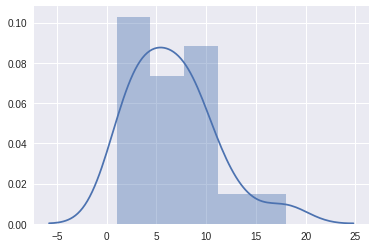

In [12]:
sns.distplot(D);

### Kurtosis

In probability theory and statistics, kurtosis (from Greek: κυρτός, kyrtos or kurtos, meaning "curved, arching") is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In a similar way to the concept of skewness, kurtosis is a descriptor of the shape of a probability distribution and, just as for skewness, there are different ways of quantifying it for a theoretical distribution and corresponding ways of estimating it from a sample from a population.

https://en.wikipedia.org/wiki/Kurtosis

Kurtosis is the fourth **standardized** moment. 

$$\gamma = \operatorname{E}\left[\left(\frac{X-\mu}{\sigma}\right)^4 \right]$$

In python:

In [14]:
kurt = 1/n*np.sum(((D-mu)/np.sqrt(var))**4)
kurt

3.7720435623194022

In [15]:
st.kurtosis(D, fisher=False)

3.772043562319403

# Describing a Distribution

Using these four values, we can describe the distribution of data.

mu: 8.75, var: 24.8875, skew: 0.31034245312510444, kurt: 2.0083456922298004


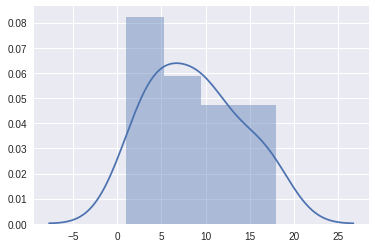

In [16]:
n = 20
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.245, var: 34.184975, skew: 0.10448833235337361, kurt: 1.7691946645121486


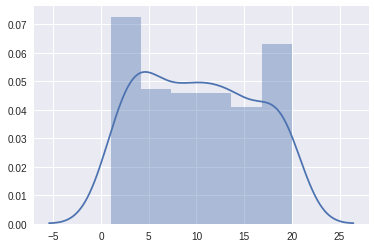

In [17]:
n = 200
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.509, var: 33.759919000000004, skew: -0.003075449394770704, kurt: 1.7771533814395155


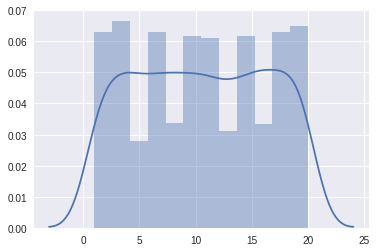

In [18]:
n = 2000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.46595, var: 33.564040597500004, skew: 0.011736568835844757, kurt: 1.7836576141290104


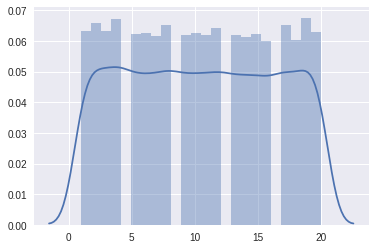

In [19]:
n = 20000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.51768, var: 33.095617417599996, skew: -0.003842021852586842, kurt: 1.8008908630591756


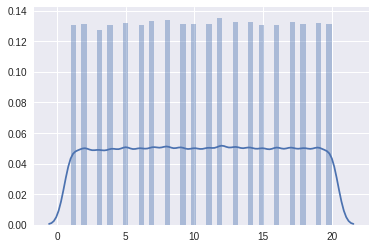

In [20]:
n = 200000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

mu: 10.5069515, var: 33.24390567664775, skew: -0.001429846653369271, kurt: 1.7943015699456661


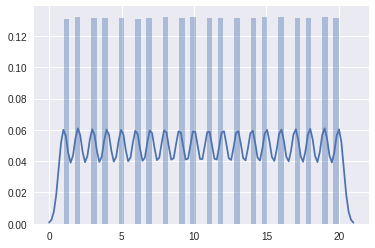

In [21]:
n = 2000000
D = np.random.randint(1,21,n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D);

#### `randint` draws from a uniform distribution

    np.random.randint()

    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).

### What about `randn`?

In [22]:
D

array([12, 10, 20, ..., 14, 13, 12])

mu: -0.28515667657310306, var: 0.5975904343273061, skew: -0.11332596360625141, kurt: 2.094805795272234


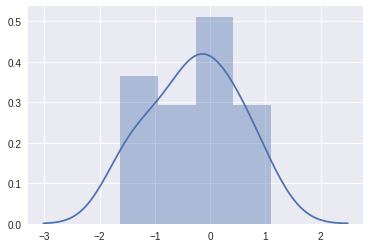

In [23]:
n = 20
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: -0.10011962644049975, var: 0.8646043947938709, skew: 0.21871217528887354, kurt: 2.660208411880269


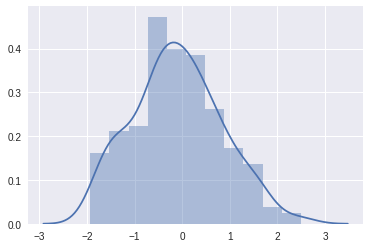

In [24]:
n = 200
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 0.006341590364856909, var: 0.989731891917423, skew: 0.03376796229086461, kurt: 3.2212860144666675


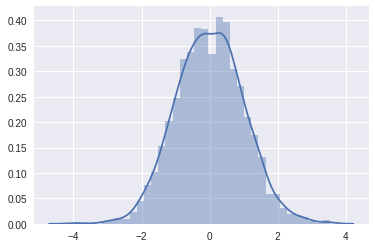

In [25]:
n = 2000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: 0.015602247809084306, var: 0.9933131306708459, skew: 0.027821653982524272, kurt: 2.979502939109923


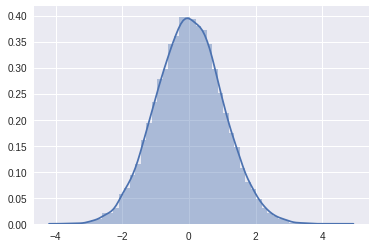

In [26]:
n = 20000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)

mu: -0.001772708954615132, var: 0.9992532638901945, skew: -0.012548321207464078, kurt: 2.991398903609023


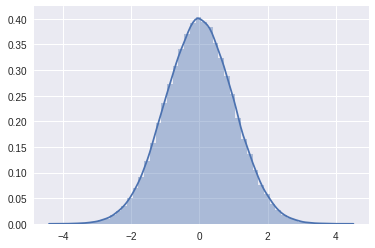

In [27]:
n = 200000
D = np.random.randn(n)
print("mu: {}, var: {}, skew: {}, kurt: {}".format(D.mean(), D.var(), st.skew(D), st.kurtosis(D, fisher=False)))
sns.distplot(D)